# ガウス分布
* 参考: ガウス過程と機械学習

In [2]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

In [3]:
def gaussian(x, mu=0, sigma=1):
    return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_th = np.linspace(-3, 3)
y_th = gaussian(x_th)

## ガウス分布に従う乱数生成
* 1次元: Box-Muller変換など
$$
    r_1 = Uniform(0, 1) \\
    r_2 = Uniform(0, 1) \\
    x = \sqrt{-2\log{r_1}} \sin{2\pi r_2}
$$
* 多次元: 共分散行列のコレスキー分解を利用

/Users/kthstkhs/.pyenv/versions/3.7.3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


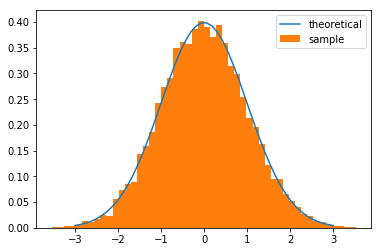

In [3]:
# 1次元
r1 = np.random.uniform(0, 1, 10000)
r2 = np.random.uniform(0, 1, 10000)
x = np.sqrt(-2 * np.log(r1)) * np.sin(2 * np.pi * r2)
plt.plot(x_th, y_th, label="theoretical")
plt.hist(x, bins=50, normed=True, label="sample")
plt.legend()
plt.show()

/Users/kthstkhs/.pyenv/versions/3.7.3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


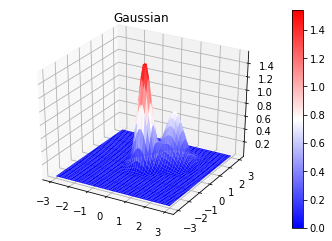

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

n = 2
mean = np.zeros(n)
sigma = np.eye(n) * 0.1
mean1 = (1, 1)
sigma1 = np.eye(n) * 0.2

N = 1000
x1 = np.linspace(-3, 3)
x2 = np.linspace(-3, 3)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y = (multivariate_normal.pdf(x=X, mean=mean, cov=sigma) + multivariate_normal.pdf(x=X, mean=mean1, cov=sigma1)).reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X1, X2, Y, cmap="bwr", linewidth=0)
fig.colorbar(surf)
ax.set_title("Gaussian")
fig.show()

[[-0.63223347  0.03980868]
 [-0.50077565 -0.19573936]
 [-0.40368888 -0.13897332]
 ...
 [ 0.53958138  0.20065447]
 [ 1.85761609  1.0319481 ]
 [ 0.41962564 -0.35254139]]


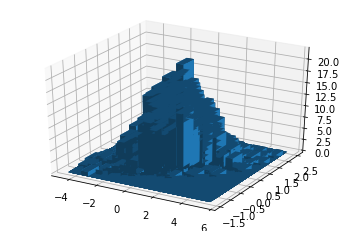

In [5]:
#　2次元正規分布からのサンプル生成
n = 2
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.normal(0, 1, 10000)
x = np.c_[x1, x2]

cov = np.array([[1, 0.9],[0.9, 1]])
L = np.linalg.cholesky(cov)
y = x.dot(L)
print(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hist, xedges, yedges = np.histogram2d(y[:, 0], y[:, 1], bins=100)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## ガウス過程
* ガウス過程に従うサンプルを生成する。
* ここでは1次元のものを生成している。

In [8]:
# 各種カーネル関数の定義
def GaussianKernel(x, c, theta1=1, theta2=1):
    return theta1 * np.exp(- np.abs(x[None] - c[:, None]) ** 2 / theta2)

def LinearKernel(x, c):
    return x[None].T.dot(c[None])

def ExponentialKernel(x, c, theta=1):
    return np.exp(- np.abs(x[None] - c[:, None]) / theta)

def PeriodicKernel(x, c, theta1=1, theta2=1):
    return np.exp(theta1 * np.cos(np.abs(x[None] - c[:, None]) / theta2))

def Matern3Kernel(x, c, theta=1):
    return (1 + np.sqrt(3) * np.abs(x[None] - c[:, None]) / theta) * np.exp(- np.sqrt(3) * np.abs(x[None] - c[:, None]) / theta)

def Matern5Kernel(x, c, theta=1):
    return (1 + np.sqrt(5) * np.abs(x[None] - c[:, None]) / theta + 5 * np.abs(x[None] - c[:, None]) ** 2 / (3 * theta ** 2)) * np.exp(- np.sqrt(5) * np.abs(x[None] - c[:, None]) / theta)

def per(x, c, sigma=1., l=1., T=1.):
    return sigma * np.exp(- 2 / l**2 * np.sin(np.pi / T * np.abs(x[None] - c[:, None]) ** 2))

def ARD(x, c, w, theta1=1.):
#     w = np.ones(x.shape[1])
    if len(w) == 1:
        return theta1 * np.exp(- 1 / 2 * ((x[None] - x[:, None]) ** 2) * w)
    else:
        return theta1 * np.exp(- 1 / 2 * ((x[None] - x[:, None]) ** 2).dot(w))

(100, 2)


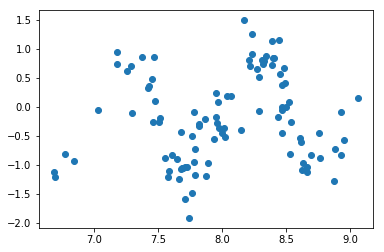

In [6]:
x1 = np.random.normal(8, 0.5, 100)
t = np.sin(2 * np.pi * x1) + np.random.normal(0, 0.4, 100)
# x2 = x1 + np.random.normal(0, 0.5, 100)
x3 = np.random.normal(1, 0.5, 100)
X = np.vstack([x1, x3]).T
print(X.shape)
plt.plot(x1, t, "o")

In [ ]:
# N = 1000
# x1 = np.linspace(-3, 3)
# x2 = np.linspace(-3, 3)
# X1, X2 = np.meshgrid(x1, x2)
# X = np.c_[np.ravel(X1), np.ravel(X2)]
# Y = (multivariate_normal.pdf(x=X, mean=mean, cov=sigma) + multivariate_normal.pdf(x=X, mean=mean1, cov=sigma1)).reshape(X1.shape)

X1 = np.linspace(-5, 5, 100)
X2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(X1, X2)
X = np.c_[np.ravel(x1), np.ravel(x2)]
# X = np.vstack([X1, X2]).T
K = ARD(X, X, w=np.array([1., 1.]))
y = np.random.multivariate_normal(np.zeros(X.shape[0]), K).reshape(x1.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x1, x2, y, cmap="bwr", linewidth=0)
fig.colorbar(surf)
ax.set_title("Gaussian")
fig.show()

In [ ]:
# print((X[None] - X[:, None]).shape)
# print(((X[None] - X[:, None]).dot(np.array([1., 2., 3.]))).shape)
((X[None] - X[:, None]) ** 2).shape

<Figure size 432x288 with 0 Axes>

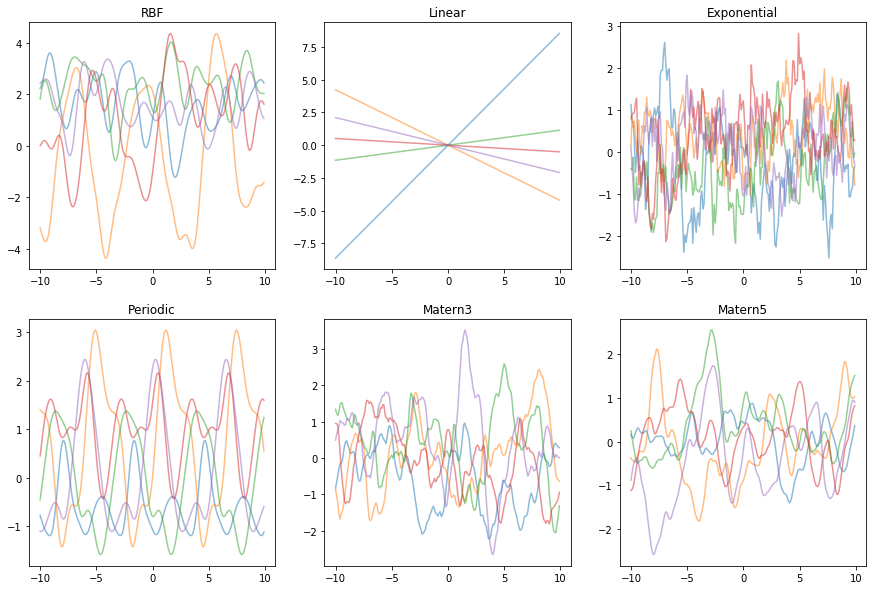

In [8]:
# ガウス過程からのサンプルを生成する
x = np.arange(-10, 10, 0.1)
K_s = []
kernel_names = ["RBF", "Linear", "Exponential", "Periodic", "Matern3", "Matern5"]
K_s.append(GaussianKernel(x, x) + PeriodicKernel(x, x))
K_s.append(LinearKernel(x, x))
K_s.append(ExponentialKernel(x, x))
K_s.append(PeriodicKernel(x, x))
K_s.append(Matern3Kernel(x, x))
K_s.append(Matern5Kernel(x, x))
# K_s.append(per(x, x))

sample_num = 5
plt.clf()
fig = plt.figure(figsize=(15, 10))
for i in range(len(K_s)):
    ax = fig.add_subplot(2, 3, i+1)
    for j in range(sample_num):
        y = np.random.multivariate_normal(np.zeros(x.shape[0]), K_s[i])
#         y = np.random.multivariate_normal(x * 0.7, K_s[i])
        plt.plot(x, y, alpha=0.5)
    plt.title(kernel_names[i])
plt.savefig("gp_samples1.png")
plt.show()

### ノイズ付き
* 観測値$y$にはノイズが乗っていると考えるのが自然なモデリングである。
* ノイズはサンプルごとに独立に$N(0, \sigma^2)$に従うとすると、$y$の事後分布を$f$で期待値を取ることにより  
    $$
        p(y|x) = N(\mu, K + \sigma^2 I)
    $$
    と表される。
* つまり、ノイズ込みでも$y$はガウス過程に従う。この時、カーネルは  
    $$
        k^{'}(x_n, x_{n^{'}}) = k(x_n, x_{n^{'}}) + \sigma^2 \delta(n, n^{'})
    $$
    とおいたことに相当する。

## 実験(ガウス過程回帰)
* 人工データについてガウス過程回帰を実装する。

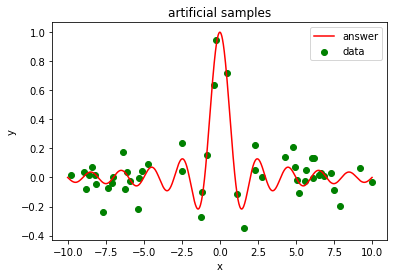

In [114]:
def generate_sample(xmin, xmax, sample_size):
#     x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    x = np.random.uniform(xmin, xmax, sample_size)
    pix = np.pi*x
#     target = np.sin(pix)/pix + 0.1*x
    target = np.sin(pix)/pix
    noise = 0.1 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise

#create answer data
def generate_answer_line(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix=np.pi*x
#     target = np.sin(pix) / pix + 0.1*x
    target = np.sin(pix) / pix
    return x, target

sample_size = 50
xmin, xmax = -10, 10
x, y = generate_sample(xmin, xmax, sample_size)
x_answer, y_answer = generate_answer_line(xmin, xmax, 1000)

plt.clf()
plt.title("artificial samples")
plt.scatter(x, y, c='green', marker='o', label="data")
# plt.plot(X, prediction, label="prediction")
plt.plot(x_answer, y_answer, c="red", label="answer")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

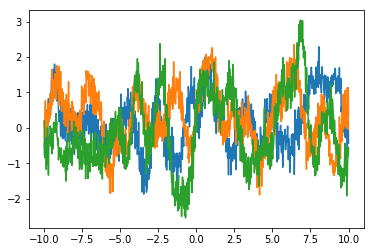

In [28]:
def GaussianKernel_noise(x, c, theta1=1, theta2=0.4, theta3=0.1):
    return theta1 * np.exp(- (x[None] - c[:, None]) ** 2 / theta2) + theta3 * np.eye(c.shape[0], x.shape[0])

x_sim = np.linspace(-10, 10, 1000)
K = GaussianKernel_noise(x_sim, x_sim)# + PeriodicKernel(x, x)

sample_num = 3
for i in range(sample_num):
    y_sim = np.random.multivariate_normal(np.zeros(x_sim.shape[0]), K)
    plt.plot(x_sim, y_sim)
plt.show()

## 予測分布
* ガウス過程回帰では重みパラメータが周辺化除去されているので通常の線形回帰でのように予測分布を求めることができない。
* カーネルを学習データと新規予測対象データをまとめたものとして再計算する。  
* 以下では`K_inv`の計算がオーバーヘッドであり$O(N^3)$かかる

(50,)

In [260]:
# 全体の同時分布を一度に計算する
x_train, y_train = generate_sample(xmin, xmax, sample_size=100)
x_test = np.linspace(-10, 10, 10000)

N = y_train.shape[0]
# K = PeriodicKernel(x_train, x_train)
K = GaussianKernel_noise(x_train, x_train) #(LinearKernel(x_train, x_train)
K_inv = np.linalg.inv(K)
yy = K_inv.dot(y_train)
K_train_test = GaussianKernel_noise(x_train, x_test)
K_test_test = GaussianKernel_noise(x_test, x_test)
mu = K_train_test.dot(yy)
var = K_test_test - K_train_test.dot(K_inv).dot(K_train_test.T)

In [261]:
# テストデータ点それぞれについて事後分布を計算する
N = y_train.shape[0]
K = GaussianKernel_noise(x_train, x_train)
K_inv = np.linalg.inv(K)
yy = K_inv.dot(y_train)
mu = []
var = []
for m in range(x_test.shape[0]):
    x_te = np.array([x_test[m]])
#     print(x_te)
    k = GaussianKernel_noise(x_train, x_te)
    s = GaussianKernel_noise(x_te, x_te)
    mu.append(k.dot(yy))
    var.append(s - k.dot(K_inv).dot(k.T))

In [262]:
mus_ = np.array(mu)
mus_ = np.squeeze(mus_)
vars_ = np.array(var)
vars_ = np.squeeze(vars_)

<Figure size 432x288 with 0 Axes>

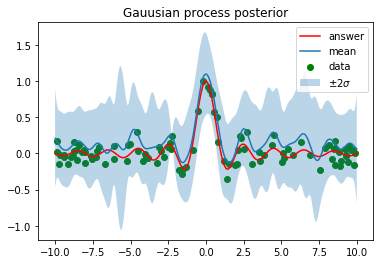

In [263]:
plt.clf()
plt.figure()
# for i in range(10):
#     y_test = np.random.multivariate_normal(mu, var)
#     plt.plot(x_test, y_test, alpha=0.2, label="GP prediction sample")
plt.plot(x_answer, y_answer, c="red", label="answer")
plt.plot(x_test, mus_, label="mean")
plt.scatter(x_train, y_train, c='green', marker='o', label="data")
plt.fill_between(x_test, mus_ + 2 * np.sqrt(vars_), mus_ - 2 * np.sqrt(vars_), alpha=0.3, label="$\pm2\sigma$")
plt.title("Gauusian process posterior")
plt.legend()
plt.show()

## ハイパーパラメタの推定
* ガウスカーネル+ノイズのカーネルを使用
* 尤度最大化を勾配法により実装

In [347]:
def log_likelihood_GP(theta, kernel, x, y):
    K = kernel(x, x, *theta)
    K_inv = np.linalg.inv(K)
    K_det = np.linalg.det(K)
    return - np.log(K_det) - y.T.dot(K_inv).dot(y)

def d_log_likelihood_GP(theta, kernel, x, y):
    dK_dtau = kernel(x, x, *theta) - theta[2] * np.identity(x.shape[0])
    dK_dsigma = dK_dtau * (1 / theta[1]) * (x[None] - x[:, None])**2
    dK_dnu = theta[2] * np.identity(x.shape[0])
    return [dK_dtau, dK_dsigma, dK_dnu]

def gradient_ascent(theta, kernel, x, y, lr=0.01, iter_num=10000):
#     K = kernel(x, x, *theta)
#     K_inv = np.linalg.inv(K)
#     K_det = np.linalg.det(K)
    delta = 1e-7
    theta_log = np.log(np.array(theta) + delta)
    theta_old = theta
    thetas = [theta]
    print("log: ", theta_log)
    print("theta: ", theta_old)
    ll = log_likelihood_GP(theta_old, kernel, x, y)
    likelihood = [ll]
    for _ in range(iter_num):
        K = kernel(x, x, *theta_old)
#         print(K)
        K_inv = np.linalg.inv(K)
        dK_dtheta = np.array(d_log_likelihood_GP(theta_old, kernel, x, y))
        dK_dtheta = np.transpose(dK_dtheta, (1, 2, 0))
        grad_theta = []
        kk = K_inv.dot(y)
        for i in range(3):
            grad_theta.append(- np.trace(K_inv.dot(dK_dtheta[:,:,i])) + kk.T.dot(dK_dtheta[:,:,i]).dot(kk))
        print("grad:", grad_theta)
        print(theta_log)
        theta_log = theta_log + lr * np.array(grad_theta)
        theta_old = list(np.exp(theta_log))
        thetas.append(theta_old)
        ll = log_likelihood_GP(theta_old, kernel, x, y)
        likelihood.append(ll)
        print("log: ", theta_log)
        print("theta: ", theta_old)
    return thetas, likelihood

th, ll = gradient_ascent(np.array([0.1, 0.4, 0.1]), GaussianKernel_noise, x_train, y_train)

log:  [-2.30258409 -0.91629048 -2.30258409]
theta:  [0.1 0.4 0.1]
grad: [-13.883660357304885, 8.062528730158105, -67.47044311042207]
[-2.30258409 -0.91629048 -2.30258409]
log:  [-2.4414207  -0.83566519 -2.97728852]
theta:  [0.08703711025964439, 0.4335859664526879, 0.05093074429578918]
grad: [-13.366053108383893, 10.73182258403316, -57.92913028105758]
[-2.4414207  -0.83566519 -2.97728852]
log:  [-2.57508123 -0.72834697 -3.55657983]
theta:  [0.07614763725365875, 0.48270625949310014, 0.028536256939763145]
grad: [-11.37589573950985, 11.93015792995425, -45.6270422933879]
[-2.57508123 -0.72834697 -3.55657983]
log:  [-2.68884019 -0.60904539 -4.01285025]
theta:  [0.06795971437368235, 0.543869805207403, 0.018081784117103608]
grad: [-8.406565590635921, 11.01714600499566, -30.724427438454605]
[-2.68884019 -0.60904539 -4.01285025]
log:  [-2.77290584 -0.49887393 -4.32009452]
theta:  [0.06248018322273213, 0.6072140407624299, 0.013298626440636743]
grad: [-5.276084490916045, 8.449952256263224, -16.317

grad: [0.0022333980781255036, 0.001674560367554534, 5.2023180302285255e-05]
[-2.82141113 -0.22625621 -4.56833234]
log:  [-2.8213888  -0.22623947 -4.56833182]
theta:  [0.0595232194630192, 0.7975270978843483, 0.010375253065190927]
grad: [0.001973409565785289, 0.0014795841006147725, 4.5965113358192866e-05]
[-2.8213888  -0.22623947 -4.56833182]
log:  [-2.82136907 -0.22622467 -4.56833136]
theta:  [0.059524394111516235, 0.7975388980557832, 0.01037525783418885]
grad: [0.0017436891553330724, 0.0013073163002772503, 4.061278880840291e-05]
[-2.82136907 -0.22622467 -4.56833136]
log:  [-2.82135163 -0.2262116  -4.56833096]
theta:  [0.05952543204097024, 0.7975493244799515, 0.010375262047871257]
grad: [0.0015407123497546138, 0.0011551107257012916, 3.588392776521232e-05]
[-2.82135163 -0.2262116  -4.56833096]
log:  [-2.82133622 -0.22620005 -4.5683306 ]
theta:  [0.059526349163718024, 0.7975585371109493, 0.01037526577092346]
grad: [0.001361365197364961, 0.001020629819791452, 3.170585742395815e-05]
[-2.821

log:  [-2.82121971 -0.2261127  -4.56832788]
theta:  [0.05953328491993942, 0.7976282004819639, 0.010375293920763699]
grad: [5.194323698276548e-06, 3.893666900012249e-06, 1.2094598389467137e-07]
[-2.82121971 -0.2261127  -4.56832788]
log:  [-2.82121966 -0.22611267 -4.56832788]
theta:  [0.059533288012291026, 0.7976282315389498, 0.010375293933312203]
grad: [4.5897232681113564e-06, 3.4404579842828298e-06, 1.0686831330986024e-07]
[-2.82121966 -0.22611267 -4.56832788]
log:  [-2.82121961 -0.22611263 -4.56832788]
theta:  [0.05953329074470426, 0.7976282589810144, 0.010375293944400102]
grad: [4.0554963760541796e-06, 3.0400009762843183e-06, 9.442923953884019e-08]
[-2.82121961 -0.22611263 -4.56832788]
log:  [-2.82121957 -0.2261126  -4.56832788]
theta:  [0.05953329315907476, 0.7976282832289217, 0.010375293954197416]
grad: [3.5834511429300164e-06, 2.68615585241605e-06, 8.34379392244955e-08]
[-2.82121957 -0.2261126  -4.56832788]
log:  [-2.82121954 -0.22611257 -4.56832788]
theta:  [0.05953329529242127, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331147771552, 0.7976284672059046, 0.010375294028532841]
grad: [1.8881216590216354e-09, 1.415269679228004e-09, 4.4011017052980606e-11]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.059533311478839585, 0.7976284672171933, 0.010375294028537412]
grad: [1.6682584202953876e-09, 1.250562320365134e-09, 3.8753000808355864e-11]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331147983276, 0.7976284672271681, 0.01037529402854143]
grad: [1.474177224736195e-09, 1.1049863246626046e-09, 3.440447926550405e-11]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114807104, 0.7976284672359818, 0.010375294028544996]
grad: [1.3024248346482636e-09, 9.76385194917384e-10, 3.035438567167148e-11]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148148578, 0.

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148736913, 0.7976284673028569, 0.010375294028572015]
grad: [6.643574579356937e-13, 4.938272013532696e-13, 0.0]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.059533311487369525, 0.7976284673028607, 0.010375294028572015]
grad: [4.796163466380676e-13, 4.014566457044566e-13, 4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148736982, 0.797628467302864, 0.010375294028572015]
grad: [5.044853423896711e-13, 3.517186542012496e-13, 7.105427357601002e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737011, 0.7976284673028669, 0.010375294028572025]
grad: [4.867217739956686e-13, 3.019806626980426e-13, -2.842170943040401e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873704, 0.7976284673028692, 0.01

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
gr

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.5

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.136868377216160

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222,

grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e

grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.797628467302888, 0.010375294028572042]
grad: [-7.105427357601002e-15, 1.7763568394002505e-14, -1.1368683772161603e-13]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028882, 0.010375294028572034]
grad: [7.105427357601002e-15, -3.552713678800501e-15, -4.263256414560601e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 0.7976284673028881, 0.010375294028572034]
grad: [4.618527782440651e-14, 7.105427357601002e-15, -1.4210854715202004e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.05953331148737222, 0.7976284673028882, 0.010375294028572034]
grad: [-3.197442310920451e-14, -2.1316282072803006e-14, 5.684341886080802e-14]
[-2.82121927 -0.22611237 -4.56832787]
log:  [-2.82121927 -0.22611237 -4.56832787]
theta:  [0.0595333114873722, 

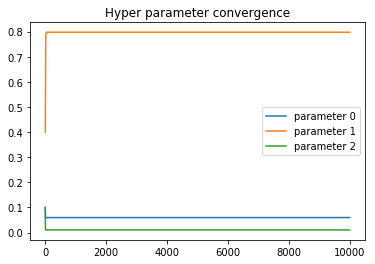

In [391]:
th = np.array(th)
for i in range(th.shape[1]):
    plt.plot(th[:, i], label="parameter {}".format(i))
plt.title("Hyper parameter convergence")
plt.legend()
plt.show()

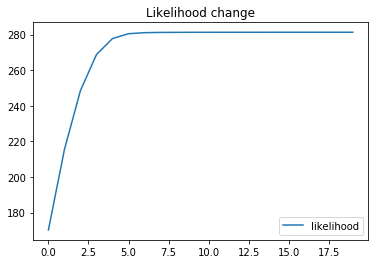

In [389]:
plt.plot(ll[:20], label="likelihood")
plt.title("Likelihood change")
plt.legend()
plt.show()

In [410]:
x_train, y_train = generate_sample(-10, 10, 40)

th_list = list(th[-1])
N = y_train.shape[0]
K = GaussianKernel_noise(x_train, x_train, theta1=0.0595, theta2=0.7976, theta3=0.01037)
K_inv = np.linalg.inv(K)
yy = K_inv.dot(y_train)
mu = []
var = []
for m in range(x_test.shape[0]):
    x_te = np.array([x_test[m]])
    k = GaussianKernel_noise(x_train, x_te, theta1=0.0595, theta2=0.7976, theta3=0.01037)
    s = GaussianKernel_noise(x_te, x_te, theta1=0.0595, theta2=0.7976, theta3=0.01037)
    mu.append(k.dot(yy))
    var.append(s - k.dot(K_inv).dot(k.T))

In [411]:
mus_ = np.array(mu)
mus_ = np.squeeze(mus_)
vars_ = np.array(var)
vars_ = np.squeeze(vars_)

<Figure size 432x288 with 0 Axes>

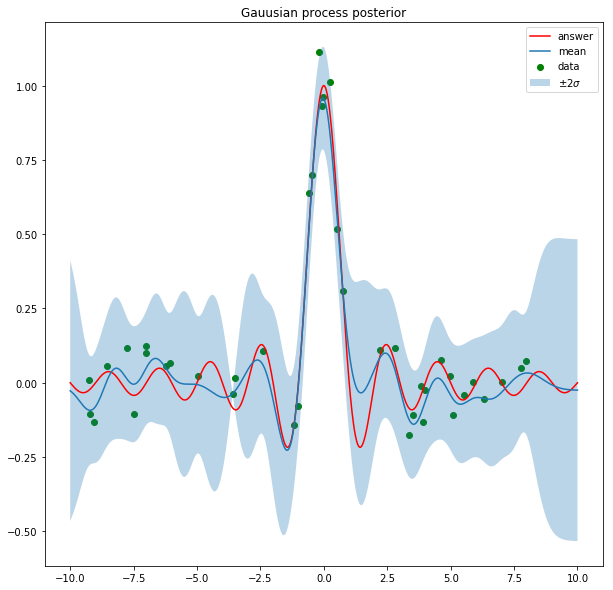

In [412]:
plt.clf()
plt.figure(figsize=(10, 10))
# for i in range(10):
#     y_test = np.random.multivariate_normal(mu, var)
#     plt.plot(x_test, y_test, alpha=0.2, label="GP prediction sample")
plt.plot(x_answer, y_answer, c="red", label="answer")
plt.plot(x_test, mus_, label="mean")
plt.scatter(x_train, y_train, c='green', marker='o', label="data")
plt.fill_between(x_test, mus_ + 2 * np.sqrt(vars_), mus_ - 2 * np.sqrt(vars_), alpha=0.3, label="$\pm2\sigma$")
plt.title("Gauusian process posterior")
plt.legend()
plt.show()

## カーネル
* 上で実装済みなのは  
    1. ガウスカーネル(動径基底(RBF)カーネル)
    2. 線形カーネル
    3. 指数カーネル
    4. 周期カーネル  
    各カーネルは解析対象に応じて使い分ける。
* 組み合わせによるカーネル関数の構築も可能である。例えば  
    $$
    k(x, x^{'}) = k^{'}(x, x^{'}) + k^{''}(x, x^{'})\\
    k(x, x^{'}) = k^{'}(x, x^{'})k^{''}(x, x^{'})
    $$  
    とすると、ともに半正定値性を持ちカーネル関数として適切である。そのため、加えるカーネル関数に重み付けをしたような  
    $$
    k(x, x^{'}) = \theta_1 x^{T} x^{'} + \theta_2 \exp{\left(\theta_3 \cos{\left(\frac{|x - x^{'}| }{\theta_4}\right)}\right)}
    $$  
    を用いると、**全体の1次関係+周期性**を持つような回帰を行うことができる。係数である$\theta$についてはカーネルのハイパーパラメータとしてML2などで推定できる。

* Multiple Kernel Learning(MKL)として知られており、一般のMKLでは混合重みのみを学習するが、ガウス過程においては内部パラメータも最適化することができる。

* Maternカーネルは空間統計においてよく用いられる。$\nu = \frac{1}{2}$の時に指数カーネル、$\nu = \infty$の時にRBFカーネルに一致し、両者を連続的につなぐカーネルとなる。

* 文字列、グラフ、木構造についてもカーネルが定義可能。

## ガウス過程の一般化

* 観測モデルは  
    $$
    p(y|f) = N(f, \sigma^2 I)
    $$  
    を想定していた
*  一般には  
    $$
    p(f|y) \propto p(y|f)p(f)
    $$
    はガウス分布にはならない。
    計算は
    1. MCMC
    2. ラプラス近似
    3. 期待値伝搬法
    4. 変分ベイズ法
    などで行う。
* ロバスト化を目的に**コーシー分布**を利用することがある。
* プロビット回帰、ロジスティック回帰、ポアソン回帰など種々の回帰モデルに適用可能である。